# <font color=white>06. Regressão Linear Simples</font>
---

<img src="https://letscode.com.br/images/logoLcPng.png" width="250px" style="position: absolute; top: 5px; right: 20px; border-radius: 5px;" />

## Roteiro da Aula

1. Correlação vs Regressão Linear
2. Regressão Linear: Conceitos Iniciais
3. Entendendo a regressão linear na prática
4. Como encontrar a reta de regressão ideal? (Minimizando o erro)
5. Exemplo prático: Peso e Altura  
    - Conhecendo as bibliotecas: `sklearn` e `statsmodels`  
    - Modelo com a presença de outliers  
6. Características do Erro
7. Métricas para Análise dos Erros

---

## 1. Correlação vs Regressão Linear

| Correlação | Regressão |
|:----------:|:---------:|
| Mede o grau de relação entre duas variáveis | Uma variável afeta a outra |
| Grau de interrelação | Baseada em causalidade (~Relação~ → Causa e efeito) |
| $\rho(x,y)$ = $\rho(y,x)$ | Unidirecional |
| Único ponto | Linha |

### $\Rightarrow$ Correlação não implica causalidade!

In [19]:
y_est = beta_0 + beta_1 * x
y_verdadeiro = y_est + erro

NameError: name 'beta_0' is not defined

In [2]:
# Importação das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot') # tema

## 2. Regressão Linear: Conceitos iniciais

In [20]:
x = np.arange(6)
y = x

In [ ]:
x

In [ ]:
y

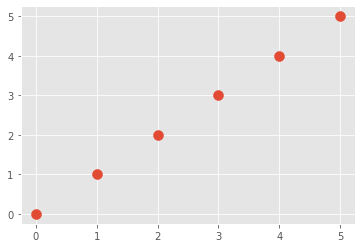

In [21]:
# Visualização
plt.scatter(x, y, s=100)

### Equação da reta de regressão
y = b0 + b1 * x

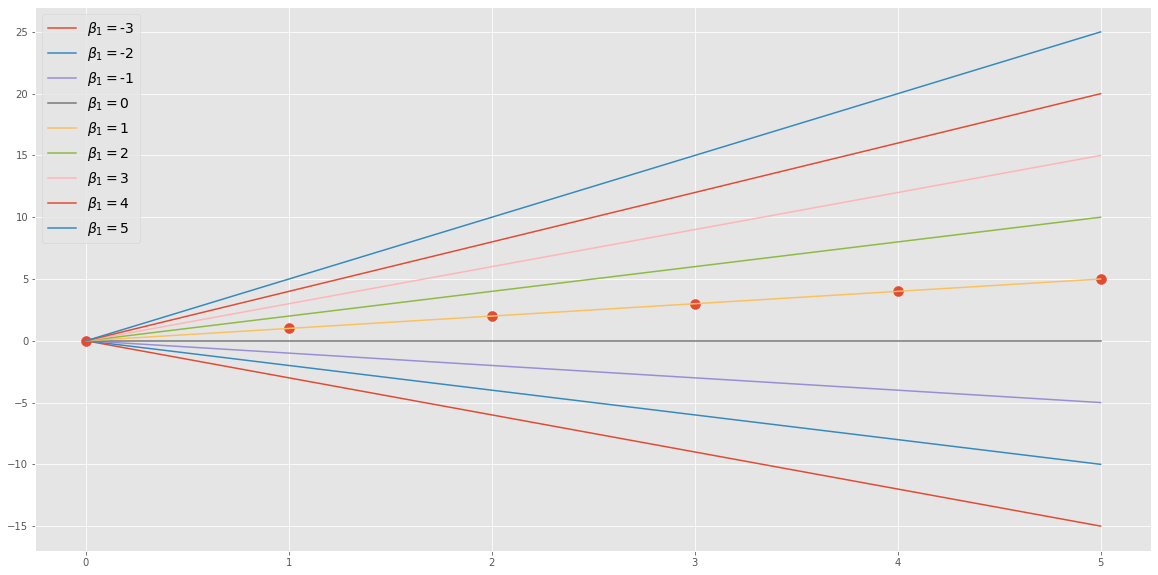

In [22]:
# Coeficiente x EQM
b0 = 0

plt.figure(figsize=(20,10))
plt.scatter(x, y, s=100)

coeficiente_erro = []

for b1 in range(-3, 6):
    y_est = b0 + b1 * x
    plt.plot(x, y_est, label='$\\beta_1 = $' + str(b1))
    
    erro = sum((y_est - y)**2) / 6 # Erro médio quadrático
    
    coeficiente_erro.append([b1, erro])
    
plt.legend(fontsize=14)

In [23]:
coeficiente_erro

[[-3, 146.66666666666666],
 [-2, 82.5],
 [-1, 36.666666666666664],
 [0, 9.166666666666666],
 [1, 0.0],
 [2, 9.166666666666666],
 [3, 36.666666666666664],
 [4, 82.5],
 [5, 146.66666666666666]]

No nosso caso, $y = x$, então, $\beta_0 = 0$, $\beta_1 = 1$.

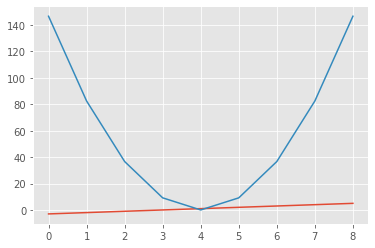

In [9]:
plt.plot(coeficiente_erro)

In [24]:
coef_erro = np.array(coeficiente_erro)

In [11]:
coef_erro[:,0]

array([-3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.])

In [12]:
coef_erro[:,1]

array([146.66666667,  82.5       ,  36.66666667,   9.16666667,
         0.        ,   9.16666667,  36.66666667,  82.5       ,
       146.66666667])

Text(0, 0.5, 'EQM (Erro Médio Quadrático)')

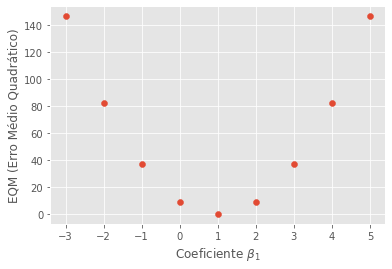

In [25]:
plt.scatter(coef_erro[:,0], coef_erro[:,1])
plt.xlabel('Coeficiente $\\beta_1$')
plt.ylabel('EQM (Erro Médio Quadrático)')

### Calculando os coeficientes $\beta_0$ e $\beta_1$ por meio das equações

$$
\beta_1 = \sum_{i=1}^N \frac{(x_i - \bar{x}) \cdot (y_i - \bar{y})}{(x_i - \bar{x})^2}
$$

$$
\beta_0 = \bar{y} - \beta_1\bar{x}
$$

In [ ]:
x

In [ ]:
y

In [27]:
x_mean = x.mean()
y_mean = y.mean()

x_mean, y_mean

(2.5, 2.5)

In [ ]:
x - x_mean

In [ ]:
y - y_mean

In [ ]:
(y - y_mean) * (y - y_mean)

In [ ]:
sum((y - y_mean) * (y - y_mean))

In [ ]:
sum(x - x_mean)

In [28]:
b1 = sum( (x - x_mean) * (y - y_mean) ) / sum( (x - x_mean)**2 )
b1

1.0

In [29]:
b0 = y_mean - (b1 * x_mean)
b0

0.0

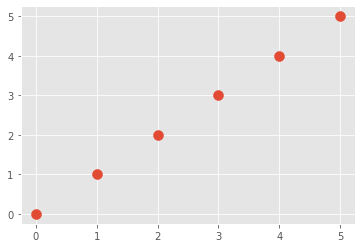

In [39]:
plt.scatter(x, y, s=100)
#plt.plot(x, b0 + b1 * x, color='blue')

## Regressão Linear Simples: Altura $\Rightarrow$ Peso

In [31]:
df = pd.read_csv('weight-height.csv')

In [32]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
df.describe().T

### Conversão das unidades

In [35]:
df['altura'] = df['Height'] * 2.54 # pol => cm

In [36]:
df['peso'] = df['Weight'] * 0.453592 # libras => kg

In [37]:
df.head()

,Gender,Height,Weight,altura,peso
0,Male,73.847017,241.893563,187.571423,109.720985
1,Male,68.781904,162.310473,174.706036,73.622732
2,Male,74.110105,212.740856,188.239668,96.497550
3,Male,71.730978,220.042470,182.196685,99.809504
4,Male,69.881796,206.349801,177.499761,93.598619


### Visualização gráfica

<AxesSubplot:xlabel='altura', ylabel='peso'>

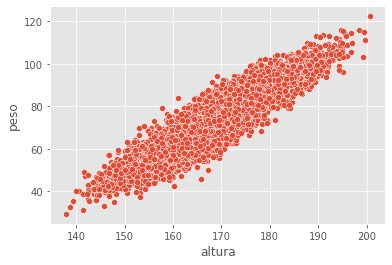

In [38]:
sns.scatterplot(data=df, x='altura', y='peso')

### Calculando a correlação entre as features

In [ ]:
from scipy.stats import pearsonr

In [ ]:
pearsonr(df['altura'], df['peso'])

- Correlação muito forte: [-1, -0.8] or [0.8, 1]

$$
\beta_1 = \sum_{i=1}^N \frac{(x_i - \bar{x}) \cdot (y_i - \bar{y})}{(x_i - \bar{x})^2}
$$

$$
\beta_0 = \bar{y} - \beta_1\bar{x}
$$

In [45]:
x = df['altura']

In [46]:
y = df['peso']

In [47]:
x_mean = x.mean()
y_mean = y.mean()

x_mean, y_mean

(168.57360177724598, 73.22805433651739)

In [48]:
b1 = sum( (x - x_mean) * (y - y_mean) ) / sum( (x - x_mean)**2 )
b1

1.3781495809287967

In [49]:
b0 = y_mean - (b1 * x_mean)
b0

-159.091584308452

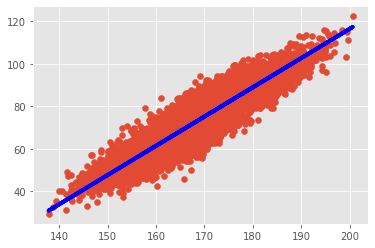

In [50]:
plt.scatter(df['altura'], df['peso'])
plt.plot(x, b0 + b1 * x, color='blue', linewidth=4)

In [51]:
y_est = b0 + b1 * x

In [ ]:
y

In [52]:
erro = y - y_est
erro

0       10.311091
1       -8.056735
2       -3.833285
3        7.806803
4        8.068981
          ...    
9995   -10.504621
9996     1.827329
9997    -6.202942
9998    -8.240614
9999    -6.193921
Length: 10000, dtype: float64

### Scikit Learning

In [53]:
!pip3 install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=3f6187c0f6110e5f69888afb4fceaf04ff691bcfd79ad6078b9a8cb068db1319
  Stored in directory: c:\users\wenderson alexandre\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
lr = LinearRegression()

In [56]:
lr

LinearRegression()

In [ ]:
df['altura']

In [57]:
X = df['altura'].values
y = df['peso'].values

In [58]:
X

array([187.57142322, 174.70603628, 188.2396677 , ..., 162.22470022,
       175.34697755, 157.33838453])

In [59]:
y

array([109.72098511,  73.62273185,  96.49755015, ...,  58.2753768 ,
        74.32216565,  51.55032378])

---

#### Entendendo o método `reshape`

In [3]:
array = np.ones(25)
array

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])

In [4]:
array.reshape(5, 5)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

---

In [ ]:
X_reshape = X.reshape(-1, 1)

In [ ]:
X_reshape.shape # Vetor coluna

In [ ]:
X.shape        # Vetor linha

In [60]:
# Treinamento do modelo: calcular os parâmetros do modelo

lr.fit(X.reshape(-1, 1), y)

LinearRegression()

In [61]:
lr.coef_ # coeficientes

array([1.37814958])

In [62]:
lr.intercept_ # intercepto

-159.09158430845105

### Statsmodels

In [ ]:
import statsmodels.api as sm

In [ ]:
x = sm.add_constant(X)

model = sm.OLS(y, x).fit()

In [ ]:
model.summary()

## Influência dos Outliers

In [69]:
df.head()

,Gender,Height,Weight,altura,peso
0,Male,73.847017,241.893563,187.571423,109.720985
1,Male,68.781904,162.310473,174.706036,73.622732
2,Male,74.110105,212.740856,188.239668,96.497550
3,Male,71.730978,220.042470,182.196685,99.809504
4,Male,69.881796,206.349801,177.499761,93.598619


### Obtendo apenas 100 amostras (como array)

In [70]:
X = df['altura'].values[:100]
y = df['peso'].values[:100]

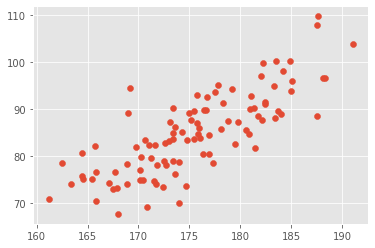

In [71]:
# Visualizando
plt.scatter(X, y)

### Modelo sem a presença dos outliers

In [72]:
lr = LinearRegression()

In [73]:
lr.fit(X.reshape(-1, 1), y)

LinearRegression()

In [65]:
lr.coef_[0]

1.378149580928791

In [66]:
lr.intercept_

-159.09158430845105

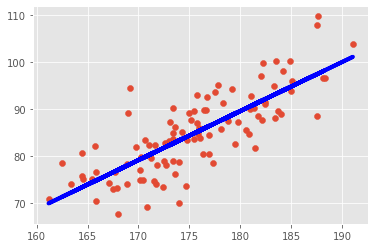

In [74]:
plt.scatter(X, y)
plt.plot(X, lr.intercept_ + lr.coef_[0] * X, color='blue', linewidth=4)

In [75]:
lr.score(X.reshape(-1, 1), y)

0.6214261131940761

### Modelo com a presença dos outliers

In [ ]:
X2 = np.append(X, [150, 140, 173])
y2 = np.append(y, [200, 100, 250])

In [ ]:
plt.scatter(X2, y2)

In [ ]:
lr2 = LinearRegression() # Modelo com os outliers

In [ ]:
lr2.fit(X2.reshape(-1, 1), y2)

In [ ]:
lr2.coef_[0]

In [2]:
lr2.intercept_

NameError: name 'lr2' is not defined

In [ ]:
plt.figure(figsize=(20, 10))

# plot de dispersão dos dados originais com os 3 outliers
plt.scatter(X2, y2)

# plot da reta de regressão do modelo treinado com os dados + outliers
plt.plot(X2, lr2.intercept_ + lr2.coef_[0] * X2, color='blue', linewidth=4, label='Modelo com outliers')
plt.plot(X2, lr.intercept_ + lr.coef_[0] * X2, color='green', linewidth=4, label='Modelo sem outliers')

plt.legend(fontsize=20)

In [ ]:
# plot de dispersão dos dados originais com os 3 outliers
plt.scatter(X, y)

# plot da reta de regressão do modelo treinado com os dados + outliers
plt.plot(X, lr2.intercept_ + lr2.coef_[0] * X, color='blue', linewidth=4, label='Modelo com outliers')
plt.plot(X, lr.intercept_ + lr.coef_[0] * X, color='green', linewidth=4, label='Modelo sem outliers')

## Características dos Resíduos

#### 1. Não devem ser correlacionados

#### Sem outliers

In [76]:
y1_est = lr.intercept_ + lr.coef_[0] * X # sem outliers

In [77]:
residuos = y - y1_est

In [78]:
residuos

array([ 12.23847679, -10.41605551,  -1.68324204,   7.94334299,
         6.64052067, -10.93862649,  -0.61900139,  -6.69814429,
         0.44059742,   1.03745092,  -5.80209135,   5.32445947,
         2.42695011,   0.56230009,  -0.6995153 ,  -2.92027033,
        -4.77351824,   7.13994933,  -1.95565208,   0.95364938,
        -2.76040881,   3.90538528,  -9.38700051,   2.67509001,
        -8.19507602,   4.89992669,  -1.19723156,  -0.89016356,
        -0.95171279, -13.27246275,   1.44755404,  -1.40390926,
        -2.86292813,   7.97381595,   6.45756184,  -0.83647932,
         4.7592617 ,   3.55224787,  -1.82181775,   1.83036849,
        -3.81602721,  -5.06552018,   1.76518136,  -3.77840911,
        -5.97519411,  -1.85630938,   2.21727739,   1.7942771 ,
         2.0011387 ,   0.97298052,   1.6962389 ,   3.44560591,
        -4.60414973,   2.0976939 ,  -2.29359128,  -3.90511334,
         3.15048432,  -2.18109307,  -0.59787555,   7.73223693,
        -0.84027929,   3.76451322,  -8.82465138,  -4.48

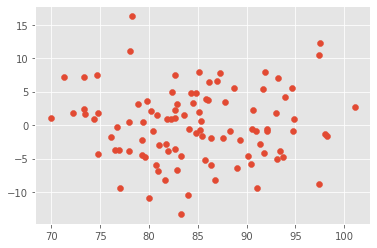

In [79]:
plt.scatter(y1_est, residuos)

#### Com outliers

In [86]:
y2_est = lr2.intercept_ + lr2.coef_[0] * X2

NameError: name 'lr2' is not defined

In [ ]:
residuos2 = y2 - y2_est

In [ ]:
residuos2

In [ ]:
plt.scatter(y2_est, residuos2)

### 2. Ter média zero

#### Sem outliers

In [ ]:
residuos.mean()

#### Com outliers

In [ ]:
residuos2.mean()

### 4. Distribuição normal dos resíduos

#### Sem outliers

In [ ]:
from scipy.stats import normaltest

In [ ]:
normaltest(residuos)

In [ ]:
sns.histplot(residuos, kde=True)

#### Com outliers

In [ ]:
sns.histplot(residuos2, kde=True)

In [ ]:
model

In [ ]:
model.resid

In [ ]:
normaltest(model.resid)

In [ ]:
sns.histplot(model.resid)

## Métricas para Análise dos Erros

$$
SQE = \sum_{i=1}^N \epsilon_i^2 = \frac{1}{N} \sum_{i=1}^N \left[y_i - \hat{y}_i\right]^2 = \frac{1}{N} \sum_{i=1}^N \left[y_i - (\beta_0 + \beta_1x_i)\right]^2
$$

$$
SQR = \sum_{i=1}^N \left(\hat{y}_i - \overline{y}\right)^2
$$

$$
SQT = \sum_{i=1}^N \left(y_i - \overline{y}\right)^2
$$

### 1. R-Quadrado ($R^2$)

$$
R^2 = 1 - \frac{SQE}{SQT} = \frac{SQT - SQE}{SQT} = \frac{SQR}{SQT}
$$

In [80]:
from sklearn.metrics import r2_score

In [81]:
lr.score(X.reshape(-1, 1), y)

0.6214261131940761

In [82]:
r2_score(y, y1_est)

0.6214261131940761

### 2. MAE

In [83]:
from sklearn.metrics import mean_absolute_error

In [84]:
mean_absolute_error(y, y1_est)

4.260493303495109

In [85]:
mean_absolute_error(y2, y2_est)

NameError: name 'y2' is not defined

### 3. MSE

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y, y1_est)

In [ ]:
mean_squared_error(y2, y2_est)

### 4. RMSE

In [ ]:
np.sqrt(mean_squared_error(y, y1_est))

In [ ]:
np.sqrt(mean_squared_error(y2, y2_est))

### 5. RMSLE

In [ ]:
from sklearn.metrics import mean_squared_log_error

In [ ]:
mean_squared_log_error(y, y1_est)

In [ ]:
mean_squared_log_error(y2, y2_est)